**IMPORTING** **LIBRARIES**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import string
import nltk
import pandas as pd
from nltk.corpus import stopwords #for cleaning
from nltk.stem import LancasterStemmer ##for cleaning
from sklearn.preprocessing import OneHotEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings("ignore")
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

** DATA PRE-PROCESSING**

In [ ]:
from  google.colab import files
uploaded = files.upload()



Saving spam.csv to spam.csv


In [ ]:
df = pd.read_csv("spam.csv", encoding="latin-1", usecols= ["v1", "v2"])

In [ ]:
df

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [ ]:
df.columns=["kind", "Message"]
df

,kind,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [ ]:
df.describe()


,kind,Message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [ ]:
df.shape

(5572, 2)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   kind     5572 non-null   object
 1   Message  5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


**DATA CLEANING**

In [ ]:
stop_words = set(stopwords.words('english'))
stemmer = LancasterStemmer()

def cleaning_data(text):
    text = text.lower()
    text = re.sub(r'@\S+', '', text)
    text = re.sub(r'http\S+', '', text)
    text = re.sub(r'.pic\S+', '', text)
    text = re.sub(r'[^a-zA-Z+]', ' ', text)
    text = "".join([i for i in text if i not in string.punctuation])
    words = nltk.word_tokenize(text)
    text = " ".join([i for i in words if i not in stop_words and len(i) > 2])
    text = re.sub(r"\s+", " ", text).strip()
    return text

df["CleanMessage"] = df["Message"].apply(cleaning_data)

In [ ]:
df

,kind,Message,CleanMessage
0,ham,"Go until jurong point, crazy.. Available only ...",jurong point crazy available bugis great world...
1,ham,Ok lar... Joking wif u oni...,lar joking wif oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entry wkly comp win cup final tkts may te...
3,ham,U dun say so early hor... U c already then say...,dun say early hor already say
4,ham,"Nah I don't think he goes to usf, he lives aro...",nah think goes usf lives around though
...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,time tried contact pound prize claim easy call...
5568,ham,Will Ì_ b going to esplanade fr home?,going esplanade home
5569,ham,"Pity, * was in mood for that. So...any other s...",pity mood suggestions
5570,ham,The guy did some bitching but I acted like i'd...,guy bitching acted like interested buying some...


**CLEANING DATA USING TF-IDF**

In [ ]:
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df["CleanMessage"])

In [ ]:
encoder = OneHotEncoder(sparse=False, drop='first')
Y = encoder.fit_transform(df[["kind"]])
X_combined = np.hstack((X.toarray(), Y))

print(X_combined)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


**DATA ANALYSIS**

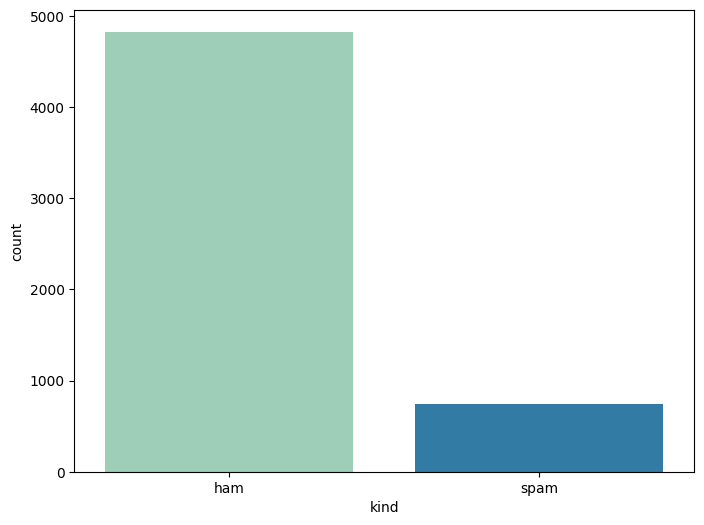

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(x="kind", data=df, palette="YlGnBu")
plt.show()

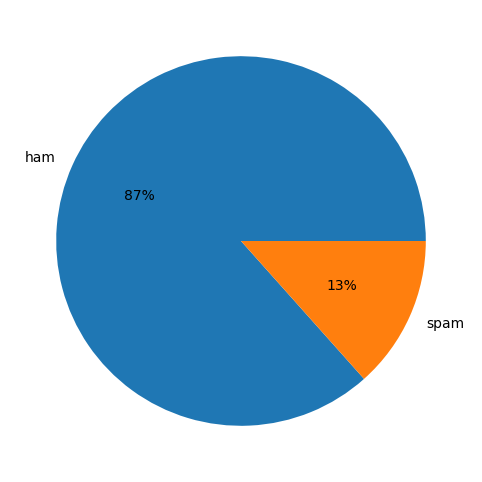

In [ ]:
plt.figure(figsize=(8, 6))
kind_counts = df["kind"].value_counts()
plt.pie(kind_counts, labels=kind_counts.index, autopct="%0.0f%%")
plt.show()

In [ ]:
X_train,X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

**USING NAVIE BAYES**

In [245]:
model = MultinomialNB()
model.fit(X_train,Y_train)

MultinomialNB()

In [246]:
model.score(X_train,Y_train)

0.9762171864482836

In [247]:
y_pred = model.predict(X_test)
y_pred

array([0., 0., 0., ..., 0., 0., 1.])

In [248]:
accuracy = accuracy_score(Y_test, y_pred)
print("Validation Accuracy:", accuracy)

Validation Accuracy: 0.9614349775784753


In [249]:
emails = [
    'Hey Mohamed, can we get together to watch football game tomorrow?',
    'Upto 20% discount on parking, exclusive offer just for you. Dont miss this reward!'
]
emails_count = vectorizer.transform(emails)
model.predict(emails_count)

array([0., 0.])

**USING LOGISTIC REGRESSION**

In [250]:
feat_vect=TfidfVectorizer(min_df=1,stop_words='english',lowercase=True)
feat_vect

TfidfVectorizer(stop_words='english')

In [251]:
model =LogisticRegression()
model.fit(X_train,Y_train)

LogisticRegression()

In [252]:
model.score(X_train, Y_train)

0.9667938074938299

In [253]:
y_pred = model.predict(X_test)
y_pred

array([0., 0., 0., ..., 0., 0., 0.])

In [254]:
accuracy = accuracy_score(Y_test, y_pred)
print("Validation Accuracy:", accuracy)

Validation Accuracy: 0.9488789237668162


**USING SVM**

In [255]:
from sklearn.svm import SVC
y_pred_svm = svm_model.predict(X_test)


In [256]:
y_pred_svm = svm_model.predict(X_test)


In [257]:
accuracy_svm = accuracy_score(Y_test, y_pred_svm)

In [258]:
report_svm = classification_report(Y_test, y_pred_svm, target_names=['Ham', 'Spam'])

In [259]:
print('SVM Accuracy:', accuracy_svm)
print('SVM Classification Report:\n', report_svm)

SVM Accuracy: 0.9757847533632287
SVM Classification Report:
               precision    recall  f1-score   support

         Ham       0.98      1.00      0.99       965
        Spam       0.97      0.85      0.90       150

    accuracy                           0.98      1115
   macro avg       0.97      0.92      0.95      1115
weighted avg       0.98      0.98      0.98      1115



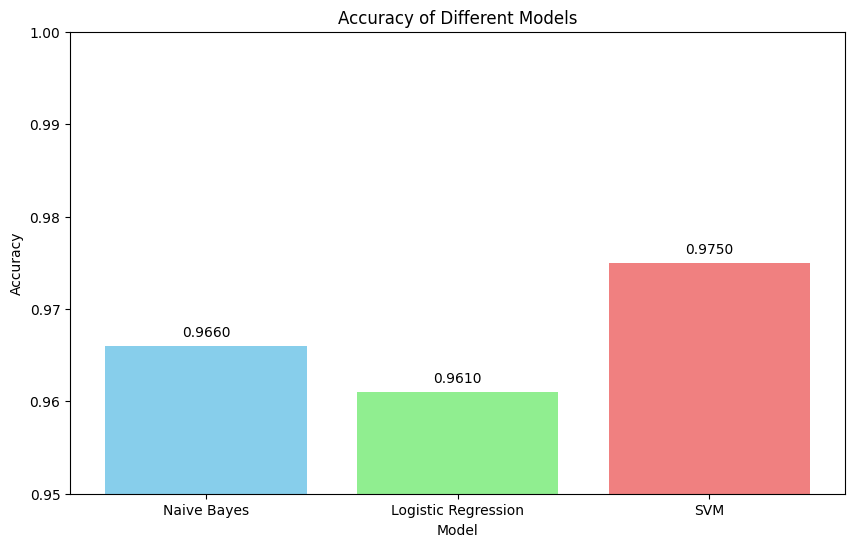

In [260]:
import matplotlib.pyplot as plt
models = ['Naive Bayes','Logistic Regression', 'SVM']

accuracy = [0.966, 0.961, 0.975]
plt.figure(figsize=(10, 6))
plt.bar(models, accuracy, color=['skyblue', 'lightgreen', 'lightcoral'])
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Accuracy of Different Models')
plt.ylim(0.95, 1)
for i, acc in enumerate(accuracy):
    plt.text(i, acc + 0.001, f'{acc:.4f}', ha = 'center')

plt.show()

 SVM got the Highest Accuracy
